In [2]:
import numpy as np
import scipy.integrate as sp
import matplotlib.pyplot as plt

# Define constants
rho = 1
c = 3.00*(10**8)
h_bar = (6.63*10**-34)/(2*np.pi)
epsilon = rho*(c**2)
m_N = (((1.6749*10**-27 * 6) + (1.6726*10**-27 * 6))/12)
m_n = (1.6749*10**-27)
m_p = (1.6726*10**-27)
m_e = (9.11*10**-31)
G = 6.67*10**-11

k_F_div1 = np.linspace(0.001, 1, 900) 
k_F_div2 = np.linspace(1.01, 10, 900)

k_F_div = k_F_div1.tolist() + k_F_div2.tolist()

k_Fs = np.array(k_F_div)*(m_n*c)
k_Fs_p = ((k_Fs**2+m_n**2-m_e**2)**2-2*m_p**2*(k_Fs**2+m_n**2+m_e**2)+m_e**4)**0.5/(2*(k_Fs**2+m_n**2)**0.5)     # Fermi momentum for both protons and electrons

k_F_div_p = k_Fs_p/(m_p*c)
k_F_div_e = k_Fs_p/(m_e*c)

Densities = (m_n/(3*np.pi**2))*(k_Fs/h_bar)**3


In [3]:
# Integrate for pressure for neutrons

def integrand_P(u):
    return (u**2 + 1)**(-1/2)*u**4

def integrate_P(x):
    I = sp.quad(integrand_P, 0, x)
    return I[0]*((m_n**4*c**5)/(3*np.pi**2*h_bar**3))

# For all k_F
    
def results_P(k_F):
    Results = []
    for i in range (0, len(k_F)):
        Results = Results + [integrate_P(k_F[i])]
    return Results
        
Pressures = np.array(results_P(k_F_div))

In [4]:
# Integrate for pressure for protons

def integrate_P_p(x):
    I = sp.quad(integrand_P, 0, x)
    return I[0]*((m_p**4*c**5)/(3*np.pi**2*h_bar**3))

# For all k_F
    
def results_P_p(k_F):
    Results = []
    for i in range (0, len(k_F)):
        Results = Results + [integrate_P_p(k_F[i])]
    return Results
        
Pressures_p = np.array(results_P_p(k_F_div_p))

In [5]:
# Integrate for pressure for electrons

def integrate_P_e(x):
    I = sp.quad(integrand_P, 0, x)
    return I[0]*((m_e**4*c**5)/(3*np.pi**2*h_bar**3))

# For all k_F
    
def results_P_e(k_F):
    Results = []
    for i in range (0, len(k_F)):
        Results = Results + [integrate_P_e(k_F[i])]
    return Results
        
Pressures_e = np.array(results_P_e(k_F_div_e))

In [6]:
Total_Pressures = Pressures + Pressures_p + Pressures_e
print (Total_Pressures)

[5.12746605e+21 1.45840369e+23 8.82463373e+23 ... 9.22491571e+37
 9.25836126e+37 9.29189732e+37]


In [7]:
# Integrate for energy density

def integrand_E(u):
    return (u**2 + 1)**(1/2)*u**2

def integrate_E(x):
    I = sp.quad(integrand_E, 0, x)
    return I[0]*((m_n**4*c**5)/(np.pi**2*h_bar**3))

# For all k_F
    
def results_E(k_F):
    Results = []
    for i in range (0, len(k_F)):
        Results = Results + [integrate_E(k_F[i])]
    return Results

E_D = results_E(k_F_div)

E_Densities = np.array(E_D)

In [8]:
# Integrate for energy density for protons

def integrate_E_p(x):
    I = sp.quad(integrand_E, 0, x)
    return I[0]*((m_p**4*c**5)/(np.pi**2*h_bar**3))

# For all k_F
    
def results_E_p(k_F):
    Results = []
    for i in range (0, len(k_F)):
        Results = Results + [integrate_E_p(k_F[i])]
    return Results

E_D_p = results_E_p(k_F_div_p)

E_Densities_p = np.array(E_D_p)

In [9]:
# Integrate for energy density for electrons

def integrate_E_e(x):
    I = sp.quad(integrand_E, 0, x)
    return I[0]*((m_e**4*c**5)/(np.pi**2*h_bar**3))

# For all k_F
    
def results_E_e(k_F):
    Results = []
    for i in range (0, len(k_F)):
        Results = Results + [integrate_E_e(k_F[i])]
    return Results

E_D_e = results_E_e(k_F_div_e)

E_Densities_e = np.array(E_D_e)

In [10]:
Total_E_Densities = E_Densities + E_Densities_p + E_Densities_e
print (Total_E_Densities)

[6.18384122e+26 5.81946335e+27 2.06946507e+28 ... 2.99957170e+38
 3.01004834e+38 3.02055254e+38]


[4.38112906e+14 2.93029335e+00]
[3.62262132e+11 3.06681213e-04]
[4.84078524e+14 2.93416350e+00]
[2.98372333e+11 2.41239412e-04]


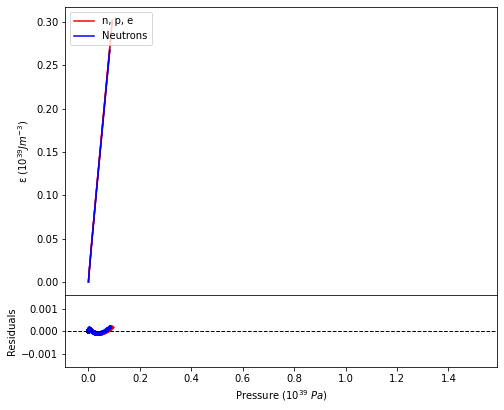

In [11]:
# Plot
from scipy.optimize import curve_fit

def func(x, a, b):
    return a*x**(3/5) + b*x

plt.figure(1).add_axes((0,0,1,1))
plt.plot(Total_Pressures/10**39, Total_E_Densities/10**39, label = 'n, p, e', color = 'red')
plt.plot(Pressures/10**39, E_Densities/10**39, label = 'Neutrons', color = 'blue')
plt.xlim([-0.09, 1.59])

plt.ylabel("ε ($10^{39} J m^{-3}$)")

popt, pcov = curve_fit(func, Pressures, E_Densities, p0 = [10**15, 10])
popt_total, pcov_total = curve_fit(func, Total_Pressures, Total_E_Densities, p0 = [10**15, 10])

print(popt)

plt.plot(Total_Pressures/10**39, func(Total_Pressures, *popt_total)/10**39, color = 'red')
plt.plot(Pressures/10**39, func(Pressures, *popt)/10**39, color = 'blue')

plt.legend(loc = 'upper left')

A_NR_tot, A_R_tot = popt_total
A_NR, A_R = popt
perr = np.sqrt(np.diag(pcov))
perr_total = np.sqrt(np.diag(pcov_total))  # Standard error

Fit_values = A_NR*Pressures**(3/5)+A_R*Pressures
Residuals = E_Densities-np.array(Fit_values)

Total_Fit_values = A_NR_tot*Total_Pressures**(3/5)+A_R_tot*Total_Pressures
Total_Residuals = Total_E_Densities-np.array(Total_Fit_values)

plt.figure(1).add_axes((0,-0.25,1,0.25))
plt.plot(np.linspace(-2.5, 55, len(Pressures)), np.linspace(0,0,len(Pressures)), color = 'black', linewidth = 1.0, linestyle = 'dashed')
plt.scatter(Total_Pressures/10**39, Total_Residuals/10**39, s = 5, color = 'red')
plt.scatter(Pressures/10**39, Residuals/10**39, s = 5, color = 'blue')
plt.xlabel("Pressure ($10^{39}$ $Pa$)")
plt.ylabel("Residuals")
plt.gca().set_ylim([-0.0016,0.0016])
plt.gca().set_xlim([-0.09,1.59])

print(perr)
print(popt_total)
print(perr_total)


Text(0.5, 0, 'Residuals')

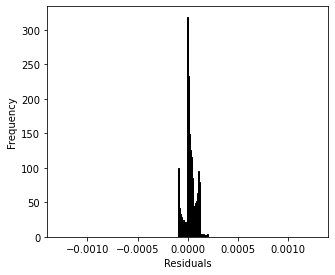

In [12]:
plt.figure(1).add_axes((0,0,0.65,0.8))
plt.hist(Residuals/10**39, bins = 30, color = 'blue', histtype='bar', ec='black')
plt.xlim([-0.00140, 0.00140])
plt.ylabel("Frequency")
plt.xlabel("Residuals")

Text(0.5, 0, 'Residuals')

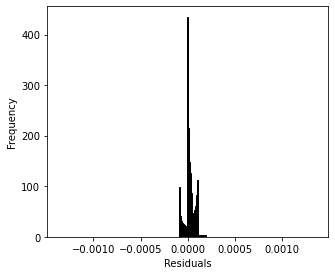

In [13]:
plt.figure(1).add_axes((0,0,0.65,0.8))
plt.hist(Total_Residuals/10**39, bins = 30, color = 'red', histtype='bar', ec='black')
plt.xlim([-0.00149, 0.00149])
plt.ylabel("Frequency")
plt.xlabel("Residuals")

In [14]:
max_residual = max(Residuals)
Tot_max_residual = max(Total_Residuals)

def find_P(Residuals, Max, E_Densities):
    N = 1
    for i in range(0, len(Residuals)):
        if Residuals[i] == Max:
            N = i
        else:
            N = N
    return E_Densities[N]

E = find_P(Residuals, max(Residuals), E_Densities)
Tot_E = find_P(Total_Residuals, max(Total_Residuals), Total_E_Densities)

print(max_residual/E)
print(Tot_max_residual/Tot_E)

0.0007570056714145112
0.0006263203693616464


In [15]:
def dM_dr(P, m, r):
    dMdr = (4*np.pi*r**2*(A_NR*P**(3/5) + A_R*P))/(c**2)
    return dMdr

def dM_dr_npe(P, m, r):
    dMdr = (4*np.pi*r**2*(A_NR_tot*P**(3/5) + A_R_tot*P))/(c**2)
    return dMdr

def dP_dr_Gen(P, m, r):
    dPdr = (-(G*(A_NR*P**(3/5) + A_R*P)*m)/(c**2*r**2))*(1+(P/(A_NR*P**(3/5) + A_R*P)))*(1+(4*np.pi*r**3*P)/(m*c**2))*(1-(2*G*m)/(c**2*r))**(-1)
    return dPdr

def dP_dr_cos(P, m, r, A):
    dPdr = -(((A_NR_tot*P**(3/5) + A_R_tot*P)+P)/c**2)*(G*(m+(4*np.pi*r**3*P)/c**2)-(c**2*A*r**3)/3)*(r**2*(1-(2*G*m)/(c**2*r)))**(-1)
    return dPdr

def dP_dr_npe(P, m, r):
    dPdr = (-(G*(A_NR_tot*P**(3/5) + A_R_tot*P)*m)/(c**2*r**2))*(1+(P/(A_NR_tot*P**(3/5) + A_R_tot*P)))*(1+(4*np.pi*r**3*P)/(m*c**2))*(1-(2*G*m)/(c**2*r))**(-1)
    return dPdr

def dP_dr_Spec(P, m, r):
    dPdr = -(G*(A_NR*P**(3/5) + A_R*P)*m)/(c**2*r**2)
    return dPdr

def integrate_Gen(P, m):
    end = False
    r = 1
    step = 50
    Masses = []
    Pressures = []
    Radii = []
    while end == False:
        slope_m = dM_dr(P, m, r)
        m = m + slope_m * step
        slope_P = dP_dr_Gen(P, m, r)
        P = P + slope_P * step
        if P < 0:
            break
        Masses = Masses + [m]
        Pressures = Pressures + [P]
        Radii = Radii + [r]
        r = r + step
    return Masses, Pressures, Radii

def integrate_Spec(P, m):
    end = False
    r = 1
    step = 50
    Masses = []
    Pressures = []
    Radii = []
    while end == False:
        slope_m = dM_dr(P, m, r)
        m = m + slope_m * step
        slope_P = dP_dr_Spec(P, m, r)
        P = P + slope_P * step
        if P < 0:
            break
        Masses = Masses + [m]
        Pressures = Pressures + [P]
        Radii = Radii + [r]
        r = r + step
    return Masses, Pressures, Radii

def integrate_npe(P, m):
    end = False
    r = 1
    step = 50
    Masses = []
    Pressures = []
    Radii = []
    while end == False:
        slope_m = dM_dr_npe(P, m, r)
        m = m + slope_m * step
        slope_P = dP_dr_npe(P, m, r)
        P = P + slope_P * step
        if P < 0:
            break
        Masses = Masses + [m]
        Pressures = Pressures + [P]
        Radii = Radii + [r]
        r = r + step
    return Masses, Pressures, Radii

def integrate_cos(P, m, A):
    end = False
    r = 1
    step = 50
    Masses = []
    Pressures = []
    Radii = []
    while end == False:
        slope_m = dM_dr_npe(P, m, r)
        m = m + slope_m * step
        slope_P = dP_dr_cos(P, m, r, A)
        P = P + slope_P * step
        if P < 0:
            break
        Masses = Masses + [m]
        Pressures = Pressures + [P]
        Radii = Radii + [r]
        r = r + step
    print (m)
    return Masses, Pressures, Radii



1.561863250373847e+30


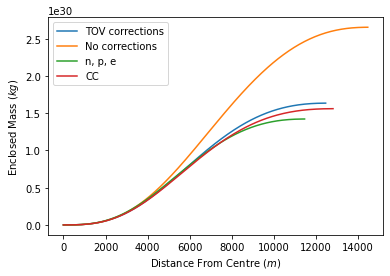

In [16]:
Int_mass_Gen, Int_pressure_Gen, Int_radius_Gen = integrate_Gen(1.118*10**34, 0)
Int_mass_Spec, Int_pressure_Spec, Int_radius_Spec = integrate_Spec(1.118*10**34, 0)
Int_mass_npe, Int_pressure_npe, Int_radius_npe = integrate_npe(1.118*10**34, 0)
Int_mass_cos, Int_pressure_cos, Int_radius_cos = integrate_cos(10**34, 0, 5*10**-10)

plt.plot(Int_radius_Gen, Int_mass_Gen, label = 'TOV corrections')
plt.plot(Int_radius_Spec, Int_mass_Spec, label = 'No corrections')
plt.plot(Int_radius_npe, Int_mass_npe, label = 'n, p, e')
plt.plot(Int_radius_cos, Int_mass_cos, label = 'CC')

plt.xlabel("Distance From Centre ($m$)")
plt.ylabel("Enclosed Mass ($kg$)")
plt.legend(loc = 'upper left')

In [17]:
def integrate_max_Gen(P, m):
    end = False
    r = 1
    step = 50
    Masses = []
    Pressures = []
    Radii = []
    while end == False:
        slope_m = dM_dr(P, m, r)
        m = m + slope_m * step
        slope_P = dP_dr_Gen(P, m, r)
        P = P + slope_P * step
        if P < 0:
            break
        Masses = Masses + [m]
        Pressures = Pressures + [P]
        Radii = Radii + [r]
        r = r + step
    return m, r

def results_Gen(P, m):
    M_maxs = []
    Radii = []
    for i in range(0, len(P)):
        M_max, Radius = integrate_max_Gen(P[i], m)
        M_maxs = M_maxs + [M_max/(1.989*10**30)]
        Radii = Radii + [Radius/1000]
    return M_maxs, Radii

def integrate_max_Spec(P, m):
    end = False
    r = 1
    step = 50
    Masses = []
    Pressures = []
    Radii = []
    while end == False:
        slope_m = dM_dr(P, m, r)
        m = m + slope_m * step
        slope_P = dP_dr_Spec(P, m, r)
        P = P + slope_P * step
        if P < 0:
            break
        Masses = Masses + [m]
        Pressures = Pressures + [P]
        Radii = Radii + [r]
        r = r + step
    return m, r

def results_Spec(P, m):
    M_maxs = []
    Radii = []
    for i in range(0, len(P)):
        M_max, Radius = integrate_max_Spec(P[i], m)
        M_maxs = M_maxs + [M_max/(1.989*10**30)]
        Radii = Radii + [Radius/1000]
    return M_maxs, Radii

def integrate_max_npe(P, m):
    end = False
    r = 1
    step = 50
    Masses = []
    Pressures = []
    Radii = []
    while end == False:
        slope_m = dM_dr_npe(P, m, r)
        m = m + slope_m * step
        slope_P = dP_dr_npe(P, m, r)
        P = P + slope_P * step
        if P < 0:
            break
        Masses = Masses + [m]
        Pressures = Pressures + [P]
        Radii = Radii + [r]
        r = r + step
    return m, r

def results_npe(P, m):
    M_maxs = []
    Radii = []
    for i in range(0, len(P)):
        M_max, Radius = integrate_max_npe(P[i], m)
        M_maxs = M_maxs + [M_max/(1.989*10**30)]
        Radii = Radii + [Radius/1000]
    return M_maxs, Radii

def integrate_max_cos(P, m, A):
    end = False
    r = 1
    step = 50
    Masses = []
    Pressures = []
    Radii = []
    while end == False:
        slope_m = dM_dr_npe(P, m, r)
        m = m + slope_m * step
        slope_P = dP_dr_cos(P, m, r, A)
        P = P + slope_P * step
        if P < 0:
            break
        Masses = Masses + [m]
        Pressures = Pressures + [P]
        Radii = Radii + [r]
        r = r + step
    return m, r

def results_cos(P, m, A):
    M_maxs = []
    Radii = []
    B = A
    for i in range(0, len(P)):
        M_max, Radius = integrate_max_cos(P[i], m, B)
        M_maxs = M_maxs + [M_max/(1.989*10**30)]
        Radii = Radii + [Radius/1000]
    return M_maxs, Radii

Cero = np.linspace(10**31, 10**32, 101)
Uno = np.linspace(2*10**32, 10**33, 101)
Dos = np.linspace(10**33, 10**34, 101)
Tres = np.linspace(10**34, 10**35, 101)
Quatro = np.linspace(10**35, 10**36, 101)
Cinco = np.linspace(10**36, 10**37, 101)
Siez = np.linspace(10**37, 10**38, 101)

P_central = Cero.tolist() + Uno.tolist() + Dos.tolist() + Tres.tolist() + Quatro.tolist() + Cinco.tolist() + Siez.tolist()
P_central2 = Uno.tolist() + Dos.tolist() + Tres.tolist() + Quatro.tolist() + Cinco.tolist() + Siez.tolist()

(0.35, 2.4)

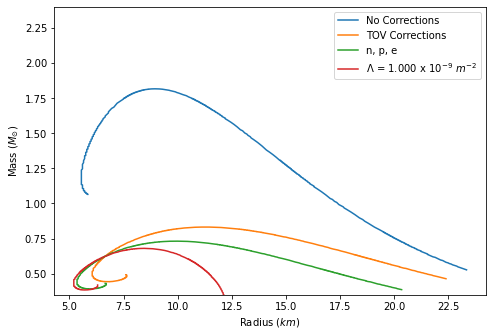

In [18]:
Mass_Gen, Radius_Gen = results_Gen(P_central2, 0)
Mass_Spec, Radius_Spec = results_Spec(P_central2, 0)
Mass_npe, Radius_npe = results_npe(P_central2, 0)
Mass_cos, Radius_cos = results_cos(P_central2, 0, -(10**-9))

plt.figure(1).add_axes((0,0,1,1))
plt.plot(Radius_Spec, Mass_Spec, label = 'No Corrections')
plt.plot(Radius_Gen, Mass_Gen, label = 'TOV Corrections')
plt.plot(Radius_npe, Mass_npe, label = 'n, p, e')
plt.plot(Radius_cos, Mass_cos, label = '$\Lambda$ = 1.000 x 10$^{-9}$ $m^{-2}$')

plt.xlabel("Radius ($km$)")
plt.ylabel("Mass ($M_{\odot}$)")
plt.legend(loc = 'upper right')
plt.ylim([0.35,2.4])

In [19]:
Max_Mass_Gen = max(Mass_Gen)
Max_Mass_Spec = max(Mass_Spec)
Max_Mass_npe = max(Mass_npe)

print ('Max Mass (TOV) :', Max_Mass_Gen, "Solar Masses")
print ('Max Mass (No TOV) :', Max_Mass_Spec, "Solar Masses")
print ('Max Mass (n, p, e) :', Max_Mass_npe, "Solar Masses")

def find_P(m, M, R):
    N = 1
    for i in range(0, len(m)):
        if m[i] == M:
            N = i
        else:
            N = N
    return R[N]

print ('Central Pressure (TOV) :', find_P(Mass_Gen, Max_Mass_Gen, Radius_Gen), 'Pa')
print ('Central Pressure (No TOV) :', find_P(Mass_Spec, Max_Mass_Spec, Radius_Spec), 'Pa')
print ('Central Pressure (No TOV) :', find_P(Mass_npe, Max_Mass_npe, Radius_npe), 'Pa')

Max Mass (TOV) : 0.8323025904757653 Solar Masses
Max Mass (No TOV) : 1.816204087505694 Solar Masses
Max Mass (n, p, e) : 0.7318219676368183 Solar Masses
Central Pressure (TOV) : 11.251 Pa
Central Pressure (No TOV) : 8.951 Pa
Central Pressure (No TOV) : 9.951 Pa


In [126]:
def integrate__max_cos(P, m, A):
    end = False
    r = 1
    step = 50
    Masses = []
    Pressures = []
    Radii = []
    while end == False:
        slope_m = dM_dr_npe(P, m, r)
        m = m + slope_m * step
        slope_P = dP_dr_cos(P, m, r, A)
        P = P + slope_P * step
        if P < 0:
            break
        Masses = Masses + [m]
        Pressures = Pressures + [P]
        Radii = Radii + [r]
        r = r + step
    print (m)
    return m, r

Mass_cos, Radius_cos = results_cos(Dos[20:-1], 0, 5*10**-10)

KeyboardInterrupt: 